# FFT Example 2

In [1]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

## With np.fft.fft2(...)

The function takes two dimension inputs for the filter image; the third parameter is D0, which defines the circle area of the High Pass Filter.



In [2]:
def idealHighPass(M, N, D0):
    # Initializing the filter with ones; 
    # Depending on which library you are calling
    rows, cols = M, N
    crow, ccol = int(rows / 2), int(cols / 2)
    center = (crow, ccol)
    
    mask = np.ones((rows, cols), dtype=np.uint8)
    x, y = np.ogrid[:rows, :cols]
    masked_location = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= D0 ** 2
    mask[masked_location] = 0
    
#     # Scanning through each pixel and calculating the distance of each pixel
#     # to the image center. If the pixel is within D0, it is changed to 0:
#     for i in range(M):
#         for j in range(N):
#             if ((i-M/2) **2 + (j-N/2)**2)**0.5 <= D0:
#                 filter[i,j]= 0
            
    return mask

In [3]:
def ButterworthLowPass(M, N, D0, n_o):
    mask = np.zeros((M, N))
    n_o = 2 * n_o
    
    for i in range(M):
        for j in range(N):
            d = ( (i-M/2)**2 + (j-N/2)**2 )**0.5
            mask[i,j]= 1 / ( 1 + (d/D0)**n_o )
    return mask


In [4]:
ideal_high = idealHighPass(256, 256, 40)
butterworth_low = ButterworthLowPass(256, 256, 40, 2)

cv2.imshow("Ideal", ideal_high * 200)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

cv2.imshow("Butterworth", butterworth_low)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [5]:
# read the image, 0 means reading as gray level
gray = cv2.imread("images/wm74_2.bmp", 0)

# Fourier transform
# output, img_dft, is a complex matrix of the image size
img_dft = np.fft.fft2(gray)

# we need to employ fftshift to bring the lower frequency components 
# to the centre of the frequency domain
dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle

print(img_dft.shape , type(img_dft), img_dft[0,0])


(427, 639) <class 'numpy.ndarray'> (37763895+0j)


In [9]:
# filtering 
M, N = gray.shape
dft_shift_abs = np.abs(dft_shift)
dft_shift_phase = np.angle(dft_shift) 

# we build a filter, same size of the image and fft
# f = ButterworthLowPass(M, N, 60, 3) 
f = idealHighPass(M, N, 60) 

# filtering, element wise multiplication
dft_shift_abs = np.multiply(dft_shift_abs, f) 
# building the complext matrix after filtering 
z = np.multiply(dft_shift_abs, np.exp((1j) * (dft_shift_phase)) )

In [10]:
# showing the results, filtered image in the fft domain
# Z is a complex matrix, same size of your image, real and imaginary elements can be seen here
print(z)
print(z.shape)

[[  65.40393631 +97.74404369j -134.02498454+162.20732572j
   201.27700016  +3.04351658j ...  -64.14326815+161.77614234j
    -8.55948483 -50.15054475j   90.42847624-132.16918958j]
 [-108.71007784-746.74166409j  -69.427195  +118.7340773j
    60.51362439-122.99393559j ...  -45.98097068-311.22205274j
   -38.1641009  +54.26233452j -398.28707274+320.2615612j ]
 [-249.96025284+395.47683205j  -48.07221133-328.08081334j
    10.7960102 +117.45223328j ... -232.59036826-191.85935199j
   238.03890235-297.39295531j  308.66420818+100.62098252j]
 ...
 [ 308.66420818-100.62098252j  238.03890235+297.39295531j
  -232.59036826+191.85935199j ...   10.7960102 -117.45223328j
   -48.07221133+328.08081334j -249.96025284-395.47683205j]
 [-398.28707274-320.2615612j   -38.1641009  -54.26233452j
   -45.98097068+311.22205274j ...   60.51362439+122.99393559j
   -69.427195  -118.7340773j  -108.71007784+746.74166409j]
 [  90.42847624+132.16918958j   -8.55948483 +50.15054475j
   -64.14326815-161.77614234j ...  201.2770

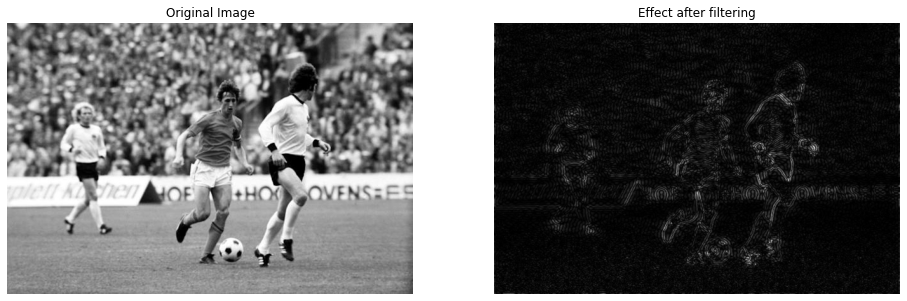

In [11]:
# fftshift used to re-shift the frequency components to their original place
# and make them ready for inverse fft transform
idft_shift = np.fft.ifftshift(z)  #Move the frequency domain from the middle to the upper left corner

# inverset fft, image is back to the spatial domain, abs is necessary since the output of
# inverse fourier, ifft, is complex
ifimg = np.fft.ifft2(idft_shift)  # Fourier library function call
ifimg = np.abs(ifimg)
ifimg = (ifimg / ifimg.max() * 255)

# showing the result
cv2.imshow("ifimg", np.uint8(ifimg))
cv2.imshow("gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

# Draw pictures
plt.figure(figsize=(16, 6))
plt.subplot(121), plt.imshow(gray, 'gray'), plt.title('Original Image')
plt.axis('off')

plt.subplot(122), plt.imshow(np.uint8(ifimg), 'gray'), plt.title('Effect after filtering')
plt.axis('off')

plt.show()

## With cv2.dft(...)

In [12]:
# read the image, 0 means reading as gray level
gray = cv2.imread("images/wm74_2.bmp", 0)

# Fourier transform
# output, img_dft, is a complex matrix of the image size
img_dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# we need to employ fftshift to bring the lower frequency components 
# to the centre of the frequency domain
dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle

print(img_dft.shape , type(img_dft), img_dft[0, 0])

(427, 639, 2) <class 'numpy.ndarray'> [3.7763896e+07 9.7656250e-02]


In [14]:
def idealHighPassCV2(M, N, D0):
    # Initializing the filter with ones; 
    # Depending on which library you are calling
    rows, cols = M, N
    crow, ccol = int(rows / 2), int(cols / 2)
    center = (crow, ccol)
    
    mask = np.ones((rows, cols, 2), dtype=np.uint8)
    x, y = np.ogrid[:rows, :cols]
    masked_location = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= D0 ** 2
    mask[masked_location] = 0
            
    return mask

In [85]:
M, N = gray.shape

f = idealHighPassCV2(M, N, 60)

z = f * dft_shift

idft_shift = np.fft.ifftshift(z)

ifimg = cv2.idft(idft_shift)

ifimg = cv2.magnitude(ifimg[:, :, 0], ifimg[:, :, 1])

ifimg = ifimg / ifimg.max() * 255

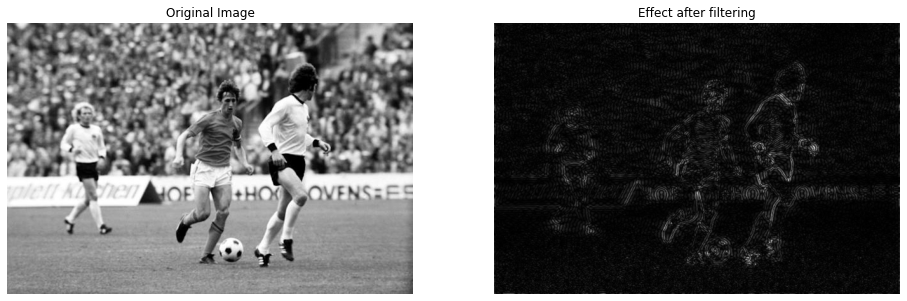

In [87]:
# showing the result
cv2.imshow("ifimg", np.uint8(ifimg))
cv2.imshow("gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

# Draw pictures
plt.figure(figsize=(16, 6))
plt.subplot(121), plt.imshow(gray, 'gray'), plt.title('Original Image')
plt.axis('off')

plt.subplot(122), plt.imshow(ifimg, 'gray'), plt.title('Effect after filtering')
plt.axis('off')

plt.show()